# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [5]:
# List to perform API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Begin Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if record_counter > 50:
            record_counter = 0
            set_counter = set_counter + 1
    
        else:
            record_counter = record_counter + 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("Record not found.")

print("-----------------------------")
print("Data Retrieval Completed")
print("-----------------------------")

Begin Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : upernavik
Processing Record 2 of Set 1 : bluff
Processing Record 3 of Set 1 : sitka
Processing Record 4 of Set 1 : hami
Processing Record 5 of Set 1 : soeng sang
Processing Record 6 of Set 1 : lyaskelya
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : barrow
Processing Record 10 of Set 1 : ushuaia
Processing Record 11 of Set 1 : biak
Processing Record 12 of Set 1 : albany
Processing Record 13 of Set 1 : bethel
Processing Record 14 of Set 1 : coihaique
Processing Record 15 of Set 1 : saskylakh
Processing Record 16 of Set 1 : puerto ayora
Record not found.
Processing Record 17 of Set 1 : sao francisco de paula
Record not found.
Processing Record 18 of Set 1 : taoudenni
Record not found.
Processing Record 19 of Set 1 : mataura
Processing Record 20 of Set 1 : tamiahua
Processing Record 21 of Set 1 : kapaa
Processing Record 22 of Set 1 : rongcheng


Processing Record 35 of Set 4 : kautokeino
Processing Record 36 of Set 4 : hithadhoo
Processing Record 37 of Set 4 : sakakah
Processing Record 38 of Set 4 : kodiak
Processing Record 39 of Set 4 : kashi
Processing Record 40 of Set 4 : alofi
Processing Record 41 of Set 4 : lake havasu city
Processing Record 42 of Set 4 : fortuna
Processing Record 43 of Set 4 : kodinsk
Processing Record 44 of Set 4 : trapani
Processing Record 45 of Set 4 : kenai
Processing Record 46 of Set 4 : itarema
Processing Record 47 of Set 4 : upata
Processing Record 48 of Set 4 : chuy
Processing Record 49 of Set 4 : auki
Processing Record 50 of Set 4 : shaoyang
Processing Record 51 of Set 4 : puerto escondido
Record not found.
Processing Record 0 of Set 5 : tuatapere
Processing Record 1 of Set 5 : vostok
Processing Record 2 of Set 5 : nuuk
Processing Record 3 of Set 5 : saint-philippe
Processing Record 4 of Set 5 : texarkana
Processing Record 5 of Set 5 : bubaque
Processing Record 6 of Set 5 : phan thiet
Processing

Processing Record 20 of Set 8 : freital
Processing Record 21 of Set 8 : tomatlan
Processing Record 22 of Set 8 : alanya
Processing Record 23 of Set 8 : adrar
Processing Record 24 of Set 8 : roswell
Processing Record 25 of Set 8 : sol-iletsk
Processing Record 26 of Set 8 : ketchikan
Processing Record 27 of Set 8 : waddan
Processing Record 28 of Set 8 : labytnangi
Processing Record 29 of Set 8 : balabac
Processing Record 30 of Set 8 : manggar
Processing Record 31 of Set 8 : pemangkat
Processing Record 32 of Set 8 : pervoye maya
Processing Record 33 of Set 8 : caravelas
Record not found.
Record not found.
Processing Record 34 of Set 8 : alice springs
Processing Record 35 of Set 8 : otaru
Processing Record 36 of Set 8 : hamina
Processing Record 37 of Set 8 : alta floresta
Processing Record 38 of Set 8 : sondrio
Processing Record 39 of Set 8 : tocopilla
Processing Record 40 of Set 8 : iqaluit
Processing Record 41 of Set 8 : coquimbo
Processing Record 42 of Set 8 : namatanai
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dictionary = pd.DataFrame({
                                  "City": city_name,
                                  "Cloudiness": cloudiness,
                                  "Country": country,
                                  "Date": date,
                                  "Humidity": humidity,
                                  "Lat": lat,
                                  "Lng": lng,
                                  "Max Temp": max_temp,
                                  "Wind Speed": wind_speed
                                  })

In [10]:
weather_dictionary.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [12]:
# Display the Data Frame

weather_dictionary

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Upernavik,71,GL,1622263917,94,72.7868,-56.1549,27.16,8.57
1,Bluff,100,NZ,1622263918,80,-46.6000,168.3333,49.80,20.92
2,Sitka,90,US,1622263918,76,57.0531,-135.3300,48.09,9.22
3,Kumul,84,CN,1622263918,15,42.8000,93.4500,88.16,10.63
4,Soeng Sang,43,TH,1622263919,57,14.4264,102.4606,90.52,9.75
...,...,...,...,...,...,...,...,...,...
541,Vizinga,79,RU,1622264079,67,61.0749,50.1031,56.43,7.45
542,Los Llanos de Aridane,20,ES,1622263931,59,28.6585,-17.9182,62.35,10.42
543,Port Hawkesbury,1,CA,1622264080,78,45.6169,-61.3485,42.69,4.61
544,Yaan,100,NG,1622264080,88,7.3833,8.5667,76.24,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

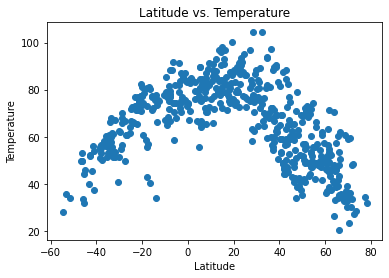

In [13]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Max Temp"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("../Images/Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

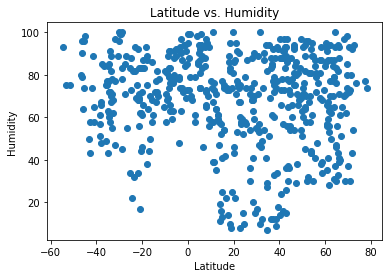

In [14]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

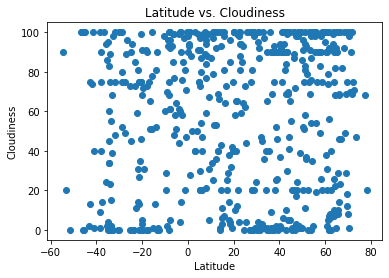

In [15]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

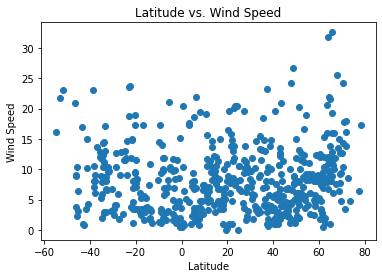

In [16]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/Latitude vs Wind Speed.png")

## Linear Regression

In [17]:
# Northern and Southern Hemispheres DataFrames
northern_hemisphere = weather_dictionary.loc[weather_dictionary["Lat"] >= 0]
southern_hemisphere = weather_dictionary.loc[weather_dictionary["Lat"] < 0]

# Functions 
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.78


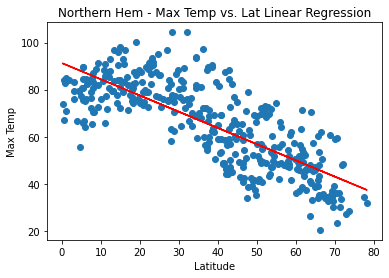

In [18]:
calculation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.title("Northern Hem - Max Temp vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79


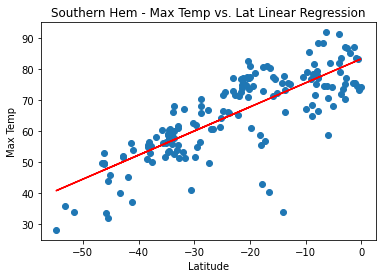

In [19]:
calculation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
plt.title("Southern Hem - Max Temp vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0


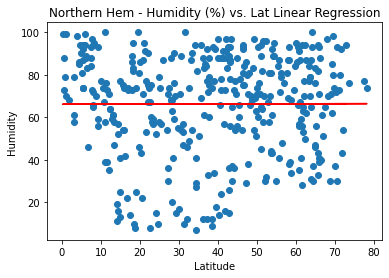

In [20]:
calculation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.title("Northern Hem - Humidity (%) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


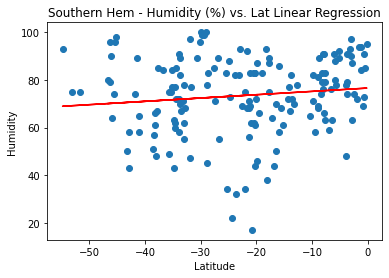

In [21]:
calculation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.title("Southern Hem - Humidity (%) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02


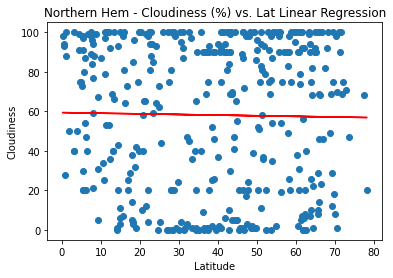

In [22]:

calculation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.title("Northern Hem - Cloudiness (%) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.13


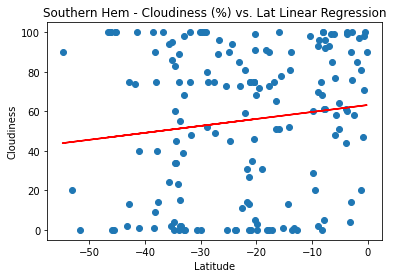

In [23]:

calculation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.title("Southern Hem - Cloudiness (%) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


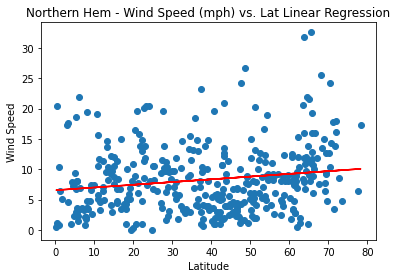

In [24]:
calculation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.title("Northern Hem - Wind Speed (mph) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


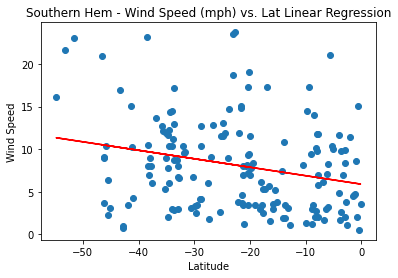

In [25]:
calculation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.title("Southern Hem - Wind Speed (mph) vs. Lat Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")